# Color Palette Tool

<i>A color palette is a combination of colors used by UI designers when designing an interface. When used correctly, color palettes form the visual foundation of your brand, help to maintain consistency, and make your user interface aesthetically pleasing and enjoyable to use.</i> (https://careerfoundry.com/en/blog/ui-design/introduction-to-color-theory-and-color-palettes/)

In this Tutorial we are going to develop our own Color Palette Tool which can derive a Color Palette from an image, e.g.

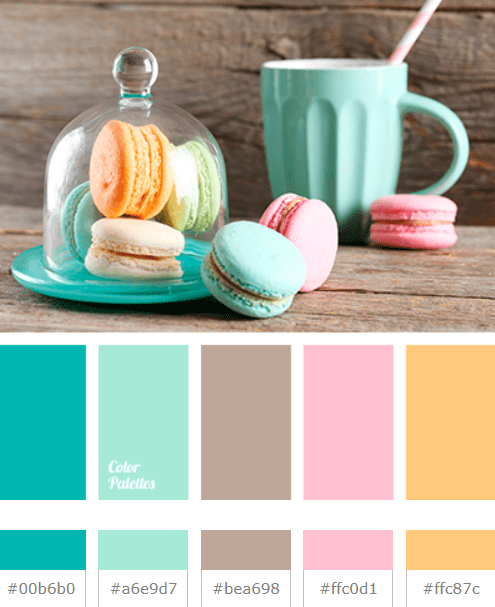

<small>(Taken from https://colorpalettes.net/color-palette-3986/)</small>

This is a good example on how we can built an actual product / service with Machine Learning. There are numerous websites online which offer this service and it is also included in some software, e.g.,

* <a href="https://www.canva.com/colors/color-palette-generator/">Canva</a>
* <a href="https://coolors.co/image-picker">Coolors</a>
* <a href="https://palettegenerator.com/">Palette Generator</a>

Although we are probably not able to sell our machine learning model later, you could still create an website (like the one aboves) and show some advertisement. 💰

## Step One: Load the images
In the first set we will load the required libraries and some sample images...

In [ ]:
## Import the required packages
import sklearn
import util
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib.pyplot import pie


images = util.load_images()

Now we can have a look at the different images...

**Your taks**:
1) How many example images do we have?

2) Take a look at all of them

In [ ]:
# You can have a look at the images, e.g. by calling
io.imshow(images[0])

Now let's make sure we understand how the algorithm works in this case

* Every image consists of **pixels**.
* One pixel is one "dot" and has a color.
* A specific **color** is defined by adding up the three base colors: R(ed), G(reen), B(lue) or <a href="https://en.wikipedia.org/wiki/RGB_color_space">RGB</a>
* The colors (red, green, blue) can have a value between 0 and 255. Mixing the three colors resuls in the final color.
* Because the pixels have a three colors with values between 0 and 255, we can **calculate a distance between them**, e.g.

* $P_1 = (255, 0, 0)$ (red)

* $P_2 = (255, 255, 0)$ (yellow)

* The distance between both colors is 255 (euclidean distance)
* Since the only requirement for kMeans is a **distance measure**, we can apply it here. We can use kMeans to cluster the pixels into similar groups, e.g. colors which look similar
* The clusters have - as we learned - a centre. We can use this **centre as representative color** and plot it.

## Step Two: Apply the kMeans Algorithm

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0, max_iter=5).fit(images[0].reshape(-1,3))

## Step Three: Get the centres of the clusters as representatives for the color

In [ ]:
colors = kmeans.cluster_centers_

## Step Four: Count how many pixels belong to this cluster

In [ ]:
counter = Counter(kmeans.labels_)

## Step Five: Plot the color and how many pixels belong into it in a pie chart

In [ ]:
pie(counter.values(), colors=colors / 256)

## Extra: Build a function ;-)

In [ ]:
def create_color_palette_from_image(img, k=5):
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=5).fit(img.reshape(-1,3))

    colors = kmeans.cluster_centers_
    counter = Counter(kmeans.labels_)
    
    print(kmeans.cluster_centers_)
    print(counter)
    
    f, axarr = plt.subplots(1,2)

    axarr[0].imshow(img)
    axarr[1].pie(counter.values(), colors= colors / 256)
    
    plt.show()
    plt.close()

In [ ]:
imageurl = 'https://is3-ssl.mzstatic.com/image/thumb/Purple71/v4/a7/5a/54/a75a54f1-db0c-3ebc-f14a-eb6bb3b7501f/iMessage_App_Icon-1x_U007emarketing-0-0-GLES2_U002c0-512MB-sRGB-0-0-0-85-181-0-0-0-0.png/1024x768.jpg'
create_color_palette_from_image(io.imread(imageurl))

In [ ]:
create_color_palette_from_image(images[4], 4)